In [7]:
def bg_scenario(scename, patient: str, results: str, scenario: str, state: str=None):
    """
    Process the results of a blood glucose scenario
    :param scename: the name of the scenario
    :param patient: the patient file location
    :param results: the results of the scenario (location string)
    :param scenario: the scenario file string
    :param state: the state file of the scenario
    """
    basecmdstr = f"bg-scenario name {scename} patient {patient} results {results} scenario {scenario} -q"
    if state is not None:
        basecmdstr += f" state {state}"
    # execute the command
    !{basecmdstr}


def multithread_patient_generation()

SyntaxError: expected ':' (526230788.py, line 17)

In [ ]:
bg_scenario("sepsis", "../customconfigs/Male_44_Normal.xml", "../output/sepsis", "../customconfigs/SepticShock.xml")

[19:44] sepsis <WARNING> Multiple Renal Clearances specified, but not the same. RenalDynamics will override Systemic.


[19:44] sepsis <INFO> Configuring patient
[19:44] sepsis <INFO> No patient pain susceptibility set 0.000000 being used.
[19:44] sepsis <INFO> No patient sweat susceptibility set 0.000000 being used.
[19:44] sepsis <INFO> No patient sleep amount set 8.000000 hr being used.
[19:44] sepsis <INFO> Patient lean body mass computed and set to 63.230776 kg.
[19:44] sepsis <INFO> Patient muscle mass computed and set to 29.610510 kg.
[19:44] sepsis <INFO> Patient body density computed and set to 1.057537 g/cm^3.
[19:44] sepsis <INFO> No patient heart rate maximum set. Using a computed value of 177.200000 bpm.
[19:44] sepsis <INFO> No patient heart rate minimum set. Using a default value of 0.001bpm.
[19:44] sepsis <INFO> Patient's blood type antigen has not been set. Defaulting to  0.000000
[19:44] sepsis <INFO> No patient blood volume baseline set. Using a computed value of 5517.734438 mL.
[19:44] sepsis <INFO> No patient right lung ratio set. Using the standard value of 0.525000 .
[19:44] seps

In [ ]:
!/bin/howtos/howto-patientgeneration

Usage howto-patientgeneration
[threads N] [duration N] [patient FILE] trials INPUTS [INPUTS...][config [FILE]]

Flags: 
j : Thread control -j N
d : Duration control N number of hours total simulation will take
p : Patient file to be used in trials
h : Print this message


INPUTS = [severity, plan,  mic_g_Per_l,  apply_at_m,  application_interval_m]
severity = {None, Low, Moderate, Severe}
plan = {None, Standard, Refresh, EGDT, Random}
mic_g_Per_l = Minimal Inhibitory Concentration for the infections substance
apply_at_m = n number of minutes till the first application of antibiotics
application_interval_m = N Number of minutes following an antibiotic application until it is reapplied



In [20]:
# !bg-cli -j 16 generate sepsis population data/templates/generator/population.template.xml
!bg-cli generate population data/templates/generator/population.template.xml

Error opening up data/templates/generator/population.template.xml
:1:1 error: invalid document structure


In [21]:
!bg-cli generate states

	DefaultTemplateFemale.xml
	DefaultTemplateMale.xml
	Female.xml
	Female_18_Normal.xml
	Female_30_Normal.xml
	Female_40_Overweight.xml
	Male.xml
	Male_22_Fit_Soldier.xml
	Male_24_Normal_hidrosis2.xml
	Male_25_Normal.xml
	Male_28_Normal_hr109_rr18.xml
	Male_32_Normal_hr93_rr14.xml
	Male_44_Bradycardic.xml
	Male_44_Normal.xml
	Male_44_Normal_hr109_rr15.xml
	Male_44_Normal_rr12.xml
	Male_44_SleepDeprived.xml
	Male_44_Tachycardic.xml
	StandardFemale.xml
	StandardMale.xml
0x7a6a94f8096c0x7a6a94f8096c./Scenarios/Scenarios/InitialPatientStateAll-DefaultTemplateFemale.log./Scenarios/Scenarios/InitialPatientStateAll-DefaultTemplateMale.log

0x7a6a94f8096c./Scenarios/Scenarios/InitialPatientStateAll-Female_18_Normal.log
0x7a6a94f8096c./Scenarios/Scenarios/InitialPatientStateAll-Female.log
0x7a6a94f8096c./Scenarios/Scenarios/InitialPatientStateAll-Female_30_Normal.log
0x7a6a94f8096c./Scenarios/Scenarios/InitialPatientStateAll-Male_44_Bradycardic.log
0x7a6a94f8096c./Scenarios/Scenarios/InitialPatie

In [1]:
import os
import random
import pandas as pd

os.chdir("/opt/biogears/core/biogears_py")

# sepsis mic values candidates
mic_sepsis_cands = ["8", "16", "32"]
severity_cands = ["Severe"]
treatment_plan_cands = ["None"]
antibiodelay_cands = ["46", "32"]
treatmentinterv_cands = ["30", "60"]


# try to do the howto-PatientGeneration (multi threading)
# firsr load the patient states file names and write them into the config file format
def prepare_config_file():
    patient_states = os.listdir("states")
    lines = []
    for file in patient_states:
        # randomly choose an severety from the list of the severity_cands
        severity = random.choice(severity_cands)
        # randomly choose an treatment plan from the list of the treatment_plan_cands
        treatment_plan = random.choice(treatment_plan_cands)
        # randomly choose an antibio delay from the list of the antibiodelay_cands
        antibio_delay = random.choice(antibiodelay_cands)
        # randomly choose an treatment interv from the list of the treatmentinterv_cands
        treatment_interv = random.choice(treatmentinterv_cands)
        # randomly choose an mic value from the list of the mic_sepsis_cands
        mic_value = random.choice(mic_sepsis_cands)
        # append the series as: Severity, PLAN, MIC, antibiodelay_cands, Interval for treatments, [file, Duration]
        line = [severity, treatment_plan, mic_value, antibio_delay, treatment_interv, 48, "states/" + file]
        lines.append(line)
    # create the dataframe
    df = pd.DataFrame(lines, columns=None)
    return df

In [2]:
config_csv = prepare_config_file()
# save the config_csv to the config folder
config_csv.to_csv("config/patientgenconfig.csv", index=False)

In [ ]:
!/usr/bin/howtos/howto-patientgeneration --config config/patientgenconfig.csv

2024-05-13 16:14 <WARNING> [0s] Multiple Renal Clearances specified, but not the same. RenalDynamics will override Systemic. 
2024-05-13 16:14 <INFO> [0s] Starting states/id158_Male_Short_YoungAdult_OverWeight@0s.xml__REFRESH_Inhibition_0g_Per_l_60m-0m-48hr
 
2024-05-13 16:14 <WARNING> [0s] Multiple Renal Clearances specified, but not the same. RenalDynamics will override Systemic. 
2024-05-13 16:14 <INFO> [0s] Biogears has sucesfully loaded id158_Male_Short_YoungAdult_OverWeight. 
2024-05-13 16:14 <INFO> [0s] [Action] 0(s), Patient Action : Infection
	Severity:  Eliminated
	Minimum Inhibitory Concentration: 0.016(g/L)
	Location: Gut 
2024-05-13 16:14 <WARNING> [0s] Manual Eliminaton of Infection currently not supported. 


## Next process the output csv files to extract the patient vt traces

In [1]:
import pandas as pd
import numpy as np
import os
# import matplotlib.pyplot as plt
import re

In [2]:
folder = "runtime/states"
files = os.listdir(folder)
def get_csv_and_log_files(folder):
    files = os.listdir(folder)
    csv_files = [f for f in files if f.endswith(".csv")]

    return csv_files

def load_csv_files_and_logs(folder):
    experiments = get_csv_and_log_files(folder)
    data = []
    for csv_file in experiments:
        csv = pd.read_csv(folder + "/" + csv_file)
        if "Piperacillin-BloodConcentration" in csv.columns:
            csv = csv.drop(columns=["Piperacillin-BloodConcentration"])
        if "Tazobactam-BloodConcentration" in csv.columns:
            csv = csv.drop(columns=["Tazobactam-BloodConcentration"])
        if "Piperacillin-BloodConcentration(ug/mL)" in csv.columns:
            csv = csv.drop(columns=["Piperacillin-BloodConcentration(ug/mL)"])
        if "Tazobactam-BloodConcentration(ug/mL)" in csv.columns:
            csv = csv.drop(columns=["Tazobactam-BloodConcentration(ug/mL)"])
        csv = csv.drop(columns=["Magnesium-BloodConcentration"])
        # only keep the csvs that length is larger than 500
        if len(csv) > 10:
            # set the time series as the index
            csv.set_index("Time(s)", inplace=True)
            # set the type of the index as datetime(s)
            csv.index = pd.to_datetime(csv.index, unit="s")
            # aggregate (mean) over hours
            csv = csv.resample("h").mean()
            # then change the index to normal range, not time stamps
            csv.reset_index(drop=True, inplace=True)
            data.append([csv_file, csv])

    return data


def combine_all_csvs(data):
    csvs = []
    for filename, csv in data:
        # extract the patient id from the log file
        # patient id str like: Starting states/id096_Male_Short_YoungAdult_UnderWeight@0s.xml
        # we need to match the part: 096 and convert it into an integer, the digit count is at least 3 (can larger)
        # patient_id_str = re.search(r"states/id(\d+)_", log).group(0)
        # add the patient id to the csv
        patient_id = int(filename.split("_")[0].replace("id", ""))
        multiindex = pd.MultiIndex.from_product([[patient_id], csv.index], names=["patient_id", "time"])
        csv.index = multiindex
        csvs.append(csv)
    # concatenate all the csvs
    all_data = pd.concat(csvs)
    return all_data


def add_sepsis_labels(whole_csv):
    # add the sepsis column based on the qsofa score
    whole_csv = whole_csv.copy()
    whole_csv["qsofa"] = 0
    whole_csv.loc[whole_csv["SystolicArterialPressure(mmHg)"] <= 100, "qsofa"] += 1
    whole_csv.loc[whole_csv["RespirationRate(1/min)"] >= 22, "qsofa"] += 1
    whole_csv["sepsis"] = 0
    whole_csv.loc[whole_csv["qsofa"] >= 2, "sepsis"] = 1
    return whole_csv


def get_sepsispatient_ids(wholecsv):
    sepsis_pids = []
    for pid in wholecsv.index.get_level_values(0).unique():
        if 1 in wholecsv.loc[pid]["sepsis"].values:
            sepsis_pids.append(pid)
    return sepsis_pids


def get_sepsisandnonsepsispatient_subcsv(wholecsv):
    sepsis_ids = get_sepsispatient_ids(wholecsv)
    sepsis_csvs = []
    for pid in sepsis_ids:
        sepsis_csvs.append(wholecsv.loc[[pid]])
    sepsis_csvs = pd.concat(sepsis_csvs)

    nonsepsis_csvs = wholecsv.drop(sepsis_csvs.index)
    return sepsis_csvs, nonsepsis_csvs


def plot_dist_first_occ_sepsis_time(whole_csv):
    sepsis_pids = whole_csv[whole_csv["sepsis"] == 1].index.get_level_values(0).unique()
    sepsis_csvs = []
    for pid in sepsis_pids:
        sepsis_csvs.append(whole_csv.loc[[pid]])
    sepsis_csvs = pd.concat(sepsis_csvs)
    first_occ_times = []
    for pid in sepsis_pids:
        subcsv = sepsis_csvs.loc[[pid]]
        subcsv = subcsv[subcsv["sepsis"] == 1]
        if len(subcsv) > 0:
            first_occ_time = subcsv.index[0][1]
            first_occ_times.append(first_occ_time)
    return first_occ_times

In [3]:
csvs_and_fnames = load_csv_files_and_logs(folder)
whole_csv = combine_all_csvs(csvs_and_fnames)
whole_csv = add_sepsis_labels(whole_csv)
# first_occ_times = plot_dist_first_occ_sepsis_time(whole_csv)

In [4]:
print("sepsis value counts:")
print(whole_csv['sepsis'].value_counts())
print("complete csv length")
print(len(whole_csv))
print("total number of patients:")
print(len(whole_csv.index.get_level_values(0).unique()))

sepsis value counts:
sepsis
0    1206
1      19
Name: count, dtype: int64
complete csv length
1225
total number of patients:
40


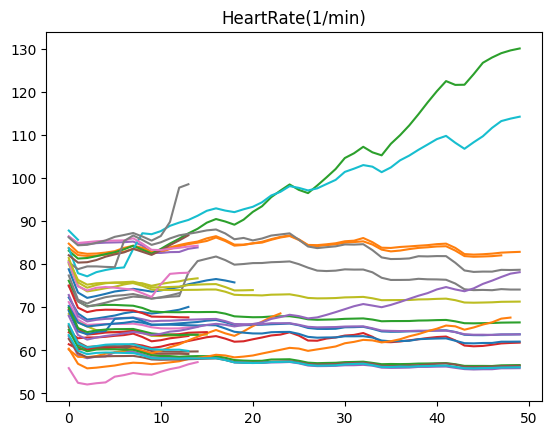

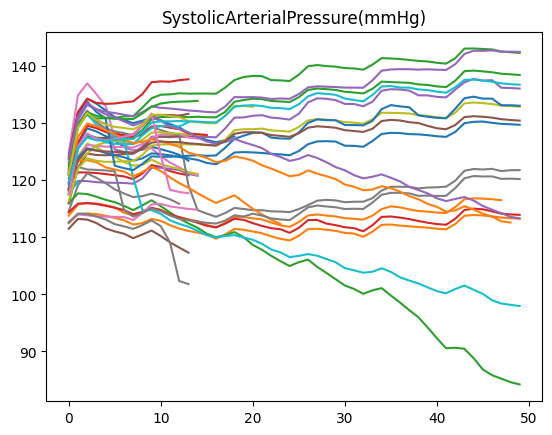

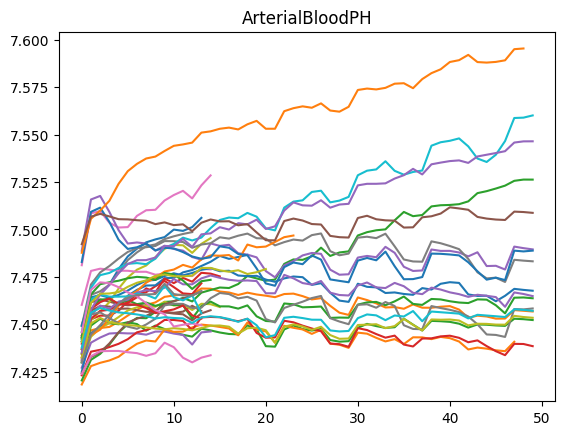

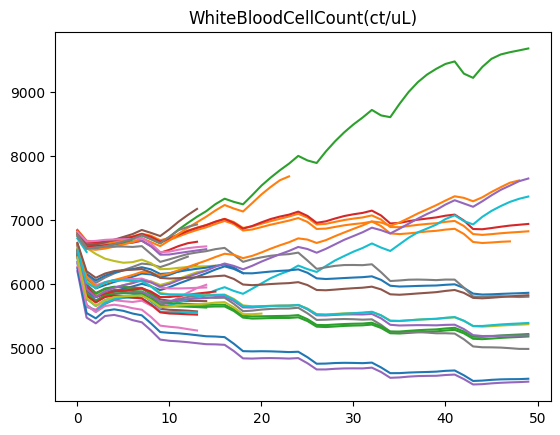

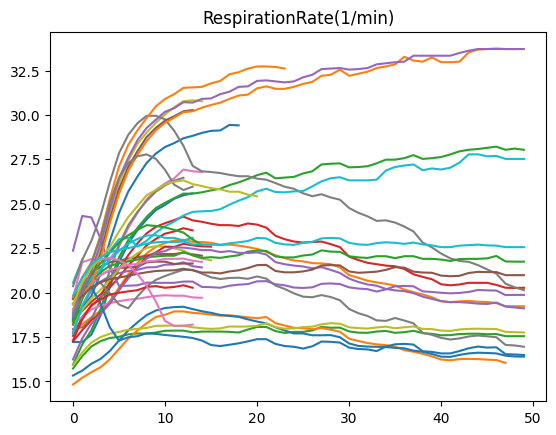

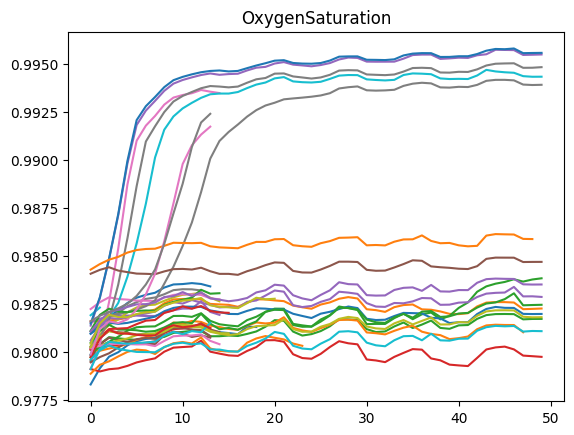

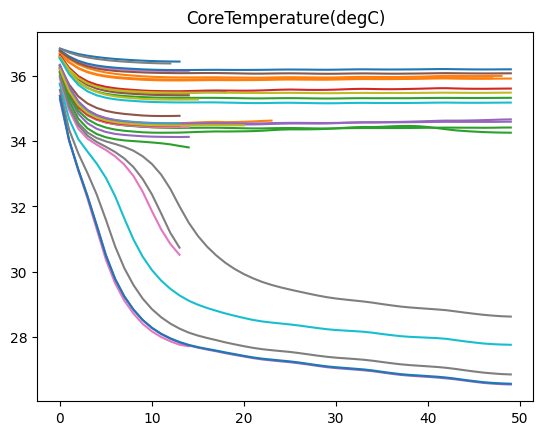

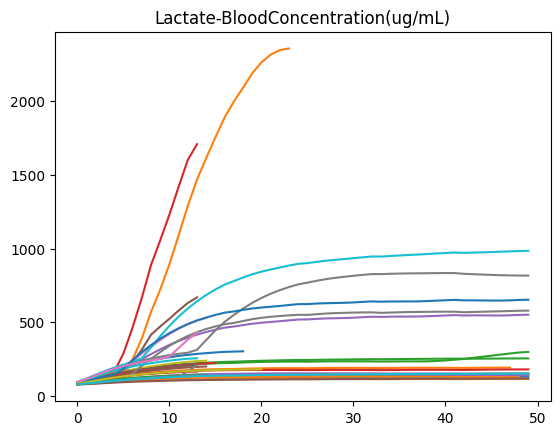

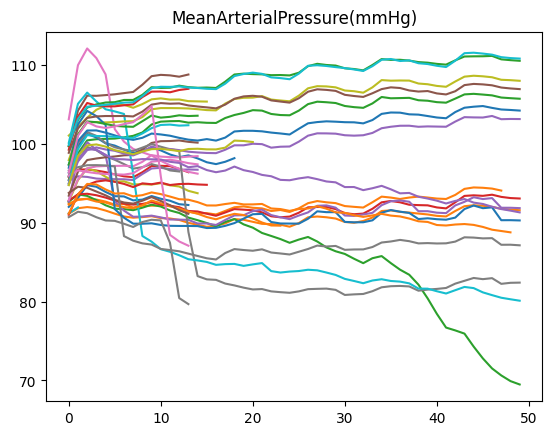

In [5]:
import matplotlib.pyplot as plt


# plot the data curves of all samples
pids = whole_csv.index.get_level_values(0).unique()
cols_to_plot = ["HeartRate(1/min)", "SystolicArterialPressure(mmHg)", "ArterialBloodPH", "WhiteBloodCellCount(ct/uL)", "RespirationRate(1/min)",
                "OxygenSaturation", "CoreTemperature(degC)", "Lactate-BloodConcentration(ug/mL)", "MeanArterialPressure(mmHg)"]
vitalsign_names = []
for col in cols_to_plot:
    for _pid in pids:
        subcsv = whole_csv.loc[[_pid]]
        subcsv = subcsv.droplevel(0)
        subcsv = subcsv[cols_to_plot]
        # subcsv = subcsv.rolling(6).mean()
        plt.plot(subcsv[col])
    plt.title(col)
    plt.show()

# Then we compare with the original one

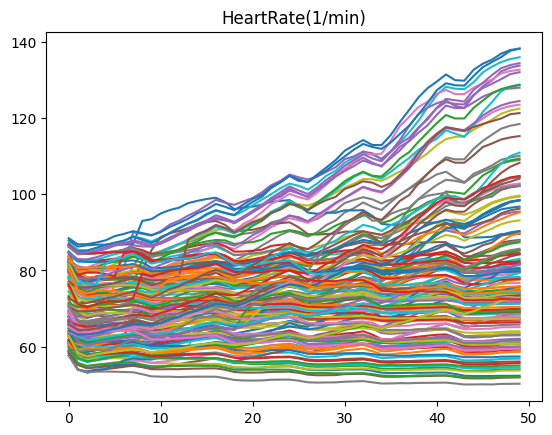

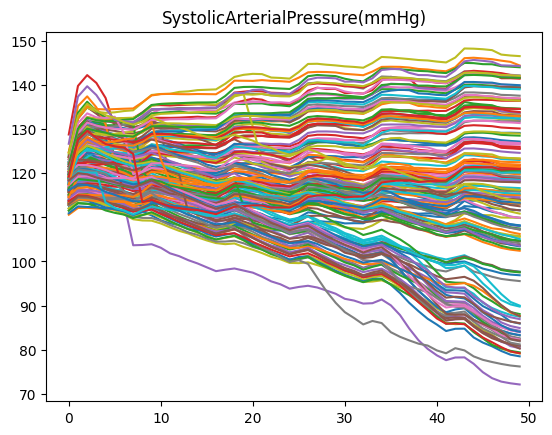

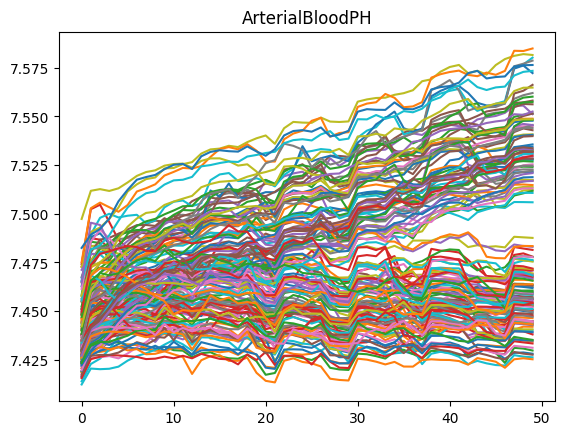

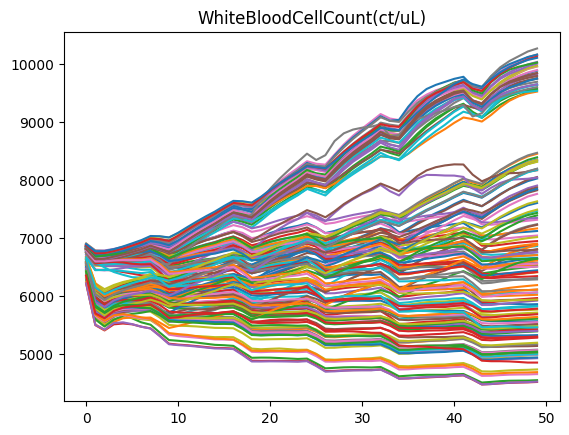

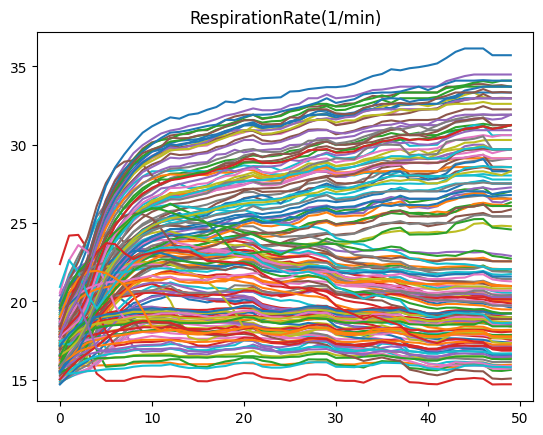

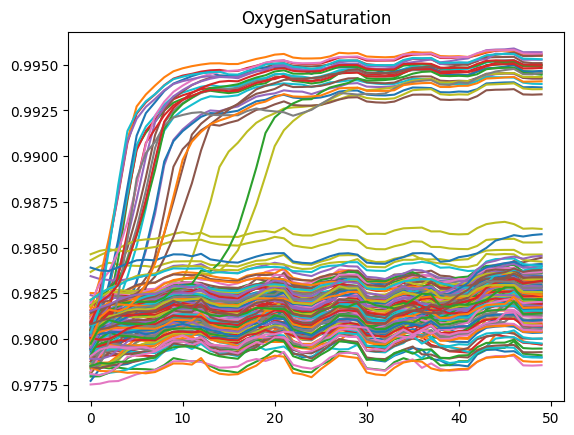

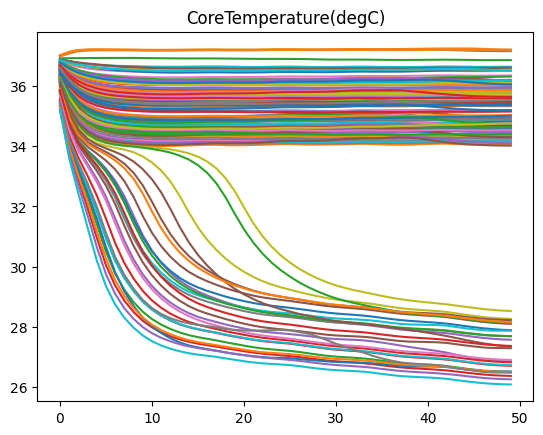

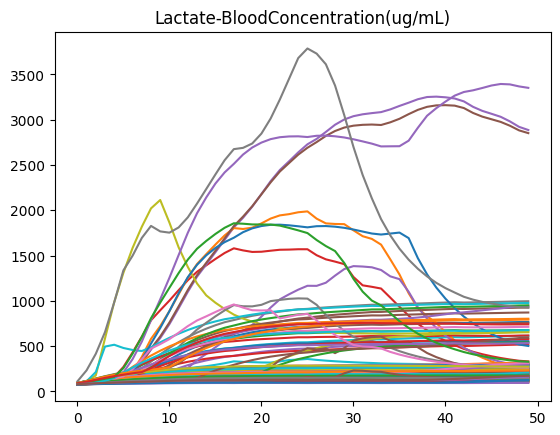

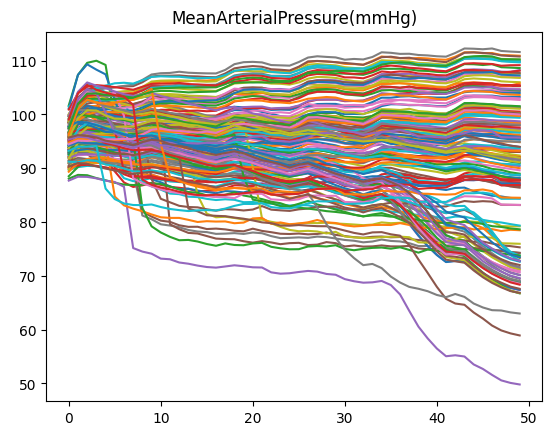

In [9]:
import pandas as pd

origin_csv = pd.read_csv("runtime/output/wholecsv.csv", index_col=[0, 1])

import matplotlib.pyplot as plt


# plot the data curves of all samples
pids = origin_csv.index.get_level_values(0).unique()
cols_to_plot = ["HeartRate(1/min)", "SystolicArterialPressure(mmHg)", "ArterialBloodPH", "WhiteBloodCellCount(ct/uL)", "RespirationRate(1/min)",
                "OxygenSaturation", "CoreTemperature(degC)", "Lactate-BloodConcentration(ug/mL)", "MeanArterialPressure(mmHg)"]
vitalsign_names = []
for col in cols_to_plot:
    for _pid in pids:
        subcsv = origin_csv.loc[[_pid]]
        subcsv = subcsv.droplevel(0)
        subcsv = subcsv[cols_to_plot]
        # subcsv = subcsv.iloc[:10, :]
        # subcsv = subcsv.rolling(6).mean()
        plt.plot(subcsv[col])
    plt.title(col)
    plt.show()

# Next is the presentation related files and figures preparation

In [6]:
# get the mean values of all columns of sepsis 1 and 0 columns separately
sepsis_1 = whole_csv[whole_csv['sepsis'] == 1]
sepsis_0 = whole_csv[whole_csv['sepsis'] == 0]
# sepsis1_pids = sepsis_1.index.get_level_values(0).unique()
# sepsis0_pids = whole_csv.index.get_level_values(0).unique().difference(sepsis1_pids)
# sepsis_1 = whole_csv.loc[sepsis1_pids]
# sepsis_0 = whole_csv.loc[sepsis0_pids]

sepsis_1_mean = sepsis_1.groupby(level=0).mean().mean()
sepsis_0_mean = sepsis_0.groupby(level=0).mean().mean()

In [7]:
sepsis_1_mean

BaseExcess(mmol/L)                       146353.415861
BUN(mg/dL)                                    7.435628
PTT                                           2.500000
CTSresistance                                 0.000000
HeartRate(1/min)                            102.156441
MeanArterialPressure(mmHg)                   77.661967
SystolicArterialPressure(mmHg)               92.198214
DiastolicArterialPressure(mmHg)              61.976496
CardiacOutput(L/min)                          5.475000
HemoglobinContent(g)                        686.952072
CentralVenousPressure(mmHg)                   3.211158
Hematocrit                                    0.598120
ArterialBloodPH                               7.519372
UrinationRate(mL/hr)                          0.000000
WhiteBloodCellCount(ct/uL)                 9103.419167
UrineProductionRate(mL/min)                   0.098834
RespirationRate(1/min)                       29.801406
OxygenSaturation                              0.984665
CarbonDiox

In [8]:
sepsis_0_mean

BaseExcess(mmol/L)                       79770.421261
BUN(mg/dL)                                   7.498940
PTT                                          1.942809
CTSresistance                                0.000000
HeartRate(1/min)                            72.121500
MeanArterialPressure(mmHg)                  94.950702
SystolicArterialPressure(mmHg)             119.697549
DiastolicArterialPressure(mmHg)             68.361836
CardiacOutput(L/min)                         6.831256
HemoglobinContent(g)                       658.247176
CentralVenousPressure(mmHg)                  4.630648
Hematocrit                                   0.425910
ArterialBloodPH                              7.470235
UrinationRate(mL/hr)                         0.000000
WhiteBloodCellCount(ct/uL)                6482.373623
UrineProductionRate(mL/min)                  0.426988
RespirationRate(1/min)                      22.566670
OxygenSaturation                             0.983232
CarbonDioxideSaturation     

In [10]:
# get the first sepsis_subcsvs pid subcsv
pid = sepsis_1.index.get_level_values(0).unique()[0]
pid_subcsv = sepsis_1.loc[[pid]]
pid_subcsv.index = pid_subcsv.index.droplevel(0)
pid_subcsv[['SystolicArterialPressure(mmHg)']].plot(subplots=True, figsize=(5, 5))
plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

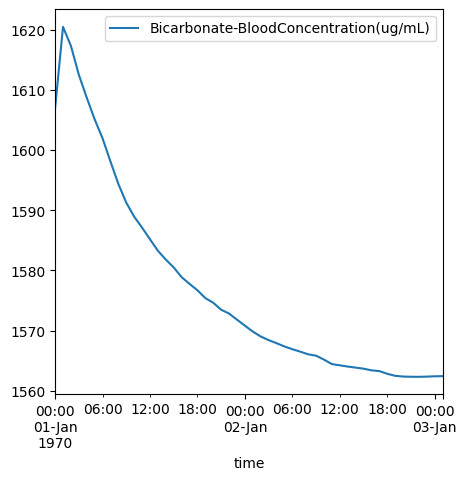

In [9]:
# get the first nonsepsis_subcsvs pid subcsv
pid = nonsepsis_csvs.index.get_level_values(0).unique()[1]
pid_subcsv = nonsepsis_csvs.loc[[pid]]
pid_subcsv.index = pid_subcsv.index.droplevel(0)
pid_subcsv[['Bicarbonate-BloodConcentration(ug/mL)']].plot(subplots=True, figsize=(5, 5))
plt.show()

In [6]:
whole_csv.to_csv("runtime/output/wholecsv.csv")

In [10]:
whole_csv.columns

Index(['BaseExcess(mmol/L)', 'BUN(mg/dL)', 'PTT', 'CTSresistance',
       'HeartRate(1/min)', 'MeanArterialPressure(mmHg)',
       'SystolicArterialPressure(mmHg)', 'DiastolicArterialPressure(mmHg)',
       'CardiacOutput(L/min)', 'HemoglobinContent(g)',
       'CentralVenousPressure(mmHg)', 'Hematocrit', 'ArterialBloodPH',
       'UrinationRate(mL/hr)', 'WhiteBloodCellCount(ct/uL)',
       'UrineProductionRate(mL/min)', 'RespirationRate(1/min)',
       'OxygenSaturation', 'CarbonDioxideSaturation', 'CoreTemperature(degC)',
       'SkinTemperature(degC)', 'TotalBilirubin(mg/dL)', 'Phosphate(mmol/mL)',
       'Bicarbonate-BloodConcentration(ug/mL)',
       'Creatinine-BloodConcentration(ug/mL)',
       'Lactate-BloodConcentration(ug/mL)',
       'Calcium-BloodConcentration(ug/mL)',
       'Chloride-BloodConcentration(ug/mL)',
       'Glucose-BloodConcentration(ug/mL)',
       'Potassium-BloodConcentration(ug/mL)',
       'Hemoglobin-BloodConcentration(g/mL)',
       'ArterialCarbonDioxi

In [ ]:
# convert the format from the bg column names to physionet style


# Next Process the prediction testing using the XGBoost

In [12]:
def slid_convet(whole_csv, win_size, step_size, pred_horizon):
    # slid processing over the second level of the multiindex
    # output shape: N, win_size, features
    pids = whole_csv.index.get_level_values(0).unique()
    samples = []
    labels = []
    for _id in pids:
        subdf = whole_csv.loc[[_id]]
        t_s = 0
        while t_s + win_size + pred_horizon < len(subdf):
            samples_tmp = subdf.iloc[t_s:t_s + win_size]
            featcols = [col for col in samples_tmp.columns if col != "sepsis"]
            samples.append(samples_tmp[featcols].values)
            labels_tmp = subdf.iloc[t_s + win_size + pred_horizon]
            labels_tmp = labels_tmp["sepsis"]
            labels.append(labels_tmp)
            t_s += step_size
    return np.array(samples), np.array(labels)

In [13]:
samples, labels = slid_convet(whole_csv, 12, 5, 6)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       498
         1.0       1.00      0.95      0.97        39

    accuracy                           1.00       537
   macro avg       1.00      0.97      0.99       537
weighted avg       1.00      1.00      1.00       537



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

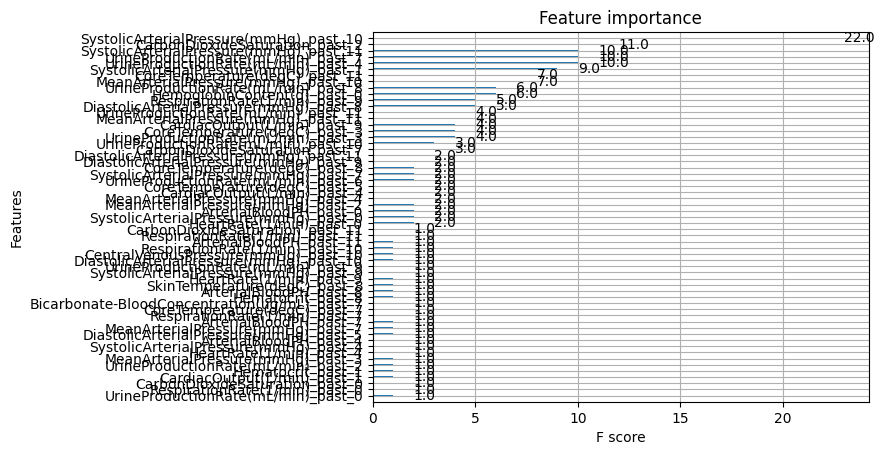

In [14]:
# do the xgboost classification of training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.33, random_state=42)

import xgboost as xgb

model = xgb.XGBClassifier()
# wrap the feature to dataframe with correct feature names
wholecsvfeatcols = [col for col in whole_csv.columns if col != "sepsis"]
reshaped_feat_cols = []
for i in range(samples.shape[1]):
    for col in wholecsvfeatcols:
        reshaped_feat_cols.append(f"{col}_past_{i}")

X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1), columns=reshaped_feat_cols)
X_test_df = pd.DataFrame(X_test.reshape(X_test.shape[0], -1), columns=reshaped_feat_cols)

model.fit(X_train_df, y_train)

preds = model.predict(X_test_df)

from sklearn.metrics import classification_report

print(classification_report(y_test, preds > 0.5))

# plot the feature importance
xgb.plot_importance(model)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       498
         1.0       0.77      0.69      0.73        39

    accuracy                           0.96       537
   macro avg       0.87      0.84      0.85       537
weighted avg       0.96      0.96      0.96       537



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

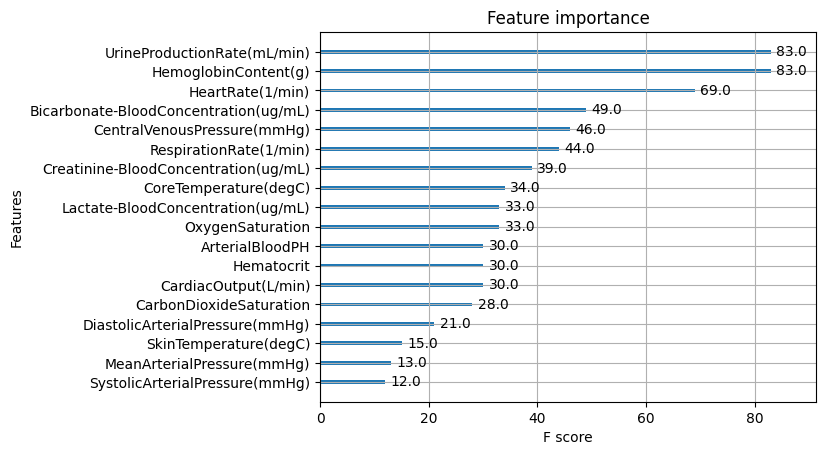

In [15]:
# next trying training the model using the feat max - min values
pos_samples = samples[labels == 1]
neg_samples = samples[labels == 0]

# get the max and min values of the features
max_vals = np.max(samples, axis=1)
min_vals = np.min(samples, axis=1)
maxmindiff_vals = max_vals - min_vals
maxmindiff_vals_df = pd.DataFrame(maxmindiff_vals, columns=wholecsvfeatcols)

# xgboost model
X_train, X_test, y_train, y_test = train_test_split(maxmindiff_vals_df, labels, test_size=0.33, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds > 0.5))

# plot the feature importance
xgb.plot_importance(model)

In [16]:
# Next get the data and train a model to fit the Bicarbonate-BloodConcentration(ug/mL) values
# first get the hist dist of the values
bicarbonate_mmol_L = whole_csv["Bicarbonate-BloodConcentration(ug/mL)"] * 0.0164

In [17]:
"""
Index(['CTSresistance', 'HeartRate(1/min)', 'MeanArterialPressure(mmHg)',
       'SystolicArterialPressure(mmHg)', 'DiastolicArterialPressure(mmHg)',
       'CardiacOutput(L/min)', 'HemoglobinContent(g)',
       'CentralVenousPressure(mmHg)', 'Hematocrit', 'ArterialBloodPH',
       'UrinationRate(mL/hr)', 'WhiteBloodCellCount(ct/uL)',
       'UrineProductionRate(mL/min)', 'RespirationRate(1/min)',
       'OxygenSaturation', 'CarbonDioxideSaturation', 'CoreTemperature(degC)',
       'SkinTemperature(degC)', 'Bicarbonate-BloodConcentration(ug/mL)',
       'Creatinine-BloodConcentration(ug/mL)',
       'Lactate-BloodConcentration(ug/mL)', 'sepsis'],
      dtype='object')
"""

def extract_bicarbonate_fit_data(wholecsv):
    cols = wholecsv.columns.tolist()
    # first get the col index of the Bicarbonate-BloodConcentration(ug/mL) values
    bicarbonate_col_idx = cols.index("Bicarbonate-BloodConcentration(ug/mL)")
    # get the bicarbonate values
    bicarbonate_vals_mmol_L = wholecsv.iloc[:, bicarbonate_col_idx] * 0.0164
    bicarbonate_vals_mmol_L.name = "HCO3"

    # then discretize the bicarbonate_vals_mmol_L based on 30, 60, 90 % percentiles
    bicarbonate_vals_mmol_L_disc = pd.qcut(bicarbonate_vals_mmol_L, q=[0, 0.33, 0.66, 1], labels=[0, 1, 2])

    # get the real-time vital sign cols
    vital_sign_cols = ["HeartRate(1/min)", "OxygenSaturation", "SkinTemperature(degC)", 
                       "SystolicArterialPressure(mmHg)", "MeanArterialPressure(mmHg)", 
                       "DiastolicArterialPressure(mmHg)", "RespirationRate(1/min)"]
    # get the col indexes of the vital signs
    vital_sign_col_idxs = [cols.index(col) for col in vital_sign_cols]
    # get the vital sign values
    vital_sign_vals = wholecsv.iloc[:, vital_sign_col_idxs]
    # rename the vital_sign_vals cols
    vital_sign_vals.columns = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp"]

    # discretize the vital sign values based on 30, 60, 90 % percentiles
    vital_sign_vals_disc = vital_sign_vals.apply(lambda x: pd.qcut(x, q=[0, 0.33, 0.66, 1], labels=[0, 1, 2]), axis=0)

    return bicarbonate_vals_mmol_L_disc, vital_sign_vals_disc

In [18]:
bicarbonate_vals_mmol_L, vital_sign_vals = extract_bicarbonate_fit_data(whole_csv)

In [19]:
# apply the xgboost to train the bicarbonate values using the vital signs
# first get the training and testing data

X_train, X_test, y_train, y_test = train_test_split(vital_sign_vals, bicarbonate_vals_mmol_L, test_size=0.2, random_state=42)
dtrainmatrix = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtestmatrix = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)
# train using dmatrix
param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax', 'num_class': 3}
num_round = 10
bst = xgb.train(param, dtrainmatrix, num_round)
# predict
preds = bst.predict(dtestmatrix)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       777
           1       0.72      0.67      0.69       777
           2       0.70      0.71      0.70       771

    accuracy                           0.73      2325
   macro avg       0.73      0.73      0.73      2325
weighted avg       0.73      0.73      0.73      2325



In [20]:
X_train.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp'], dtype='object')

In [21]:
# save the model to biogears_py/models
bst.save_model("biogears_py/models/bicarbonate_fit_model.json")

In [26]:
# using the linear regression to fit the bicarbonate values
from sklearn.linear_model import LinearRegression

"""
Index(['CTSresistance', 'HeartRate(1/min)', 'MeanArterialPressure(mmHg)',
       'SystolicArterialPressure(mmHg)', 'DiastolicArterialPressure(mmHg)',
       'CardiacOutput(L/min)', 'HemoglobinContent(g)',
       'CentralVenousPressure(mmHg)', 'Hematocrit', 'ArterialBloodPH',
       'UrinationRate(mL/hr)', 'WhiteBloodCellCount(ct/uL)',
       'UrineProductionRate(mL/min)', 'RespirationRate(1/min)',
       'OxygenSaturation', 'CarbonDioxideSaturation', 'CoreTemperature(degC)',
       'SkinTemperature(degC)', 'Bicarbonate-BloodConcentration(ug/mL)',
       'Creatinine-BloodConcentration(ug/mL)',
       'Lactate-BloodConcentration(ug/mL)', 'sepsis'],
      dtype='object')
"""

def extract_bicarbonate_fit_data_nodisc(wholecsv):
    cols = wholecsv.columns.tolist()
    # first get the col index of the Bicarbonate-BloodConcentration(ug/mL) values
    bicarbonate_col_idx = cols.index("Bicarbonate-BloodConcentration(ug/mL)")
    # get the bicarbonate values
    bicarbonate_vals_mmol_L = wholecsv.iloc[:, bicarbonate_col_idx] * 0.0164
    bicarbonate_vals_mmol_L.name = "HCO3"
    bicarbonate_vals_mmol_L = (bicarbonate_vals_mmol_L - bicarbonate_vals_mmol_L.mean()) / bicarbonate_vals_mmol_L.std()

    # get the real-time vital sign cols
    vital_sign_cols = ["HeartRate(1/min)", "OxygenSaturation", "SkinTemperature(degC)", 
                       "SystolicArterialPressure(mmHg)", "MeanArterialPressure(mmHg)", 
                       "DiastolicArterialPressure(mmHg)", "RespirationRate(1/min)"]
    # get the col indexes of the vital signs
    vital_sign_col_idxs = [cols.index(col) for col in vital_sign_cols]
    # get the vital sign values
    vital_sign_vals = wholecsv.iloc[:, vital_sign_col_idxs]
    # rename the vital_sign_vals cols
    vital_sign_vals.columns = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp"]
    vital_sign_vals = (vital_sign_vals - vital_sign_vals.mean()) / vital_sign_vals.std()

    return bicarbonate_vals_mmol_L, vital_sign_vals

bicarbonate_vals_mmol_L, vital_sign_vals = extract_bicarbonate_fit_data_nodisc(whole_csv)

X_train, X_test, y_train, y_test = train_test_split(vital_sign_vals, bicarbonate_vals_mmol_L, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, preds)

# save the model
import pickle

with open("biogears_py/models/bicarbonate_fit_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Train the model using the slid conversion raw feature

In [42]:
realtimevts_cols = ["HeartRate(1/min)", "OxygenSaturation", "SkinTemperature(degC)",
                        "SystolicArterialPressure(mmHg)", "MeanArterialPressure(mmHg)",
                        "DiastolicArterialPressure(mmHg)", "RespirationRate(1/min)"]


def slid_convet_onlyrealtvts_disc(whole_csv, win_size, step_size, pred_horizon):
    
    # slid processing over the second level of the multiindex
    # output shape: N, win_size, features
    pids = whole_csv.index.get_level_values(0).unique()
    samples = []
    labels = []
    for _id in pids:
        subdf = whole_csv.loc[[_id]]
        subdf = subdf[realtimevts_cols + ["sepsis"]]
        # rename the columns
        subdf.columns = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "sepsis"]
        t_s = 0
        while t_s + win_size + pred_horizon < len(subdf):
            samples_tmp = subdf.iloc[t_s:t_s + win_size]
            featcols = [col for col in samples_tmp.columns if col != "sepsis"]
            samples.append(samples_tmp[featcols].values)
            labels_tmp = subdf.iloc[t_s + win_size + pred_horizon]
            labels_tmp = labels_tmp["sepsis"]
            labels.append(labels_tmp)
            t_s += step_size
    return np.array(samples), np.array(labels)

# discretize the whole csv
whole_csv_disc = whole_csv.copy()
for col in whole_csv.columns:
    if col != "sepsis" and col in realtimevts_cols:
        whole_csv_disc[col] = pd.qcut(whole_csv[col], q=[0, 0.33, 0.66, 1], labels=[0, 1, 2])
        whole_csv_disc[col] = whole_csv_disc[col].astype(int)

samples, labels = slid_convet_onlyrealtvts_disc(whole_csv_disc, 12, 5, 6)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       498
         1.0       0.65      0.77      0.71        39

    accuracy                           0.95       537
   macro avg       0.82      0.87      0.84       537
weighted avg       0.96      0.95      0.96       537



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

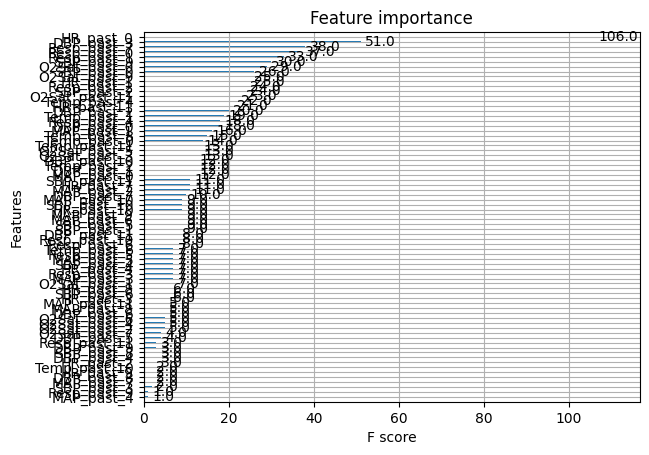

In [43]:
# do the xgboost classification of training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.33, random_state=42)

renamedcols = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp"]

import xgboost as xgb

model = xgb.XGBClassifier()
# wrap the feature to dataframe with correct feature names
reshaped_feat_cols = []
for i in range(samples.shape[1]):
    for col in renamedcols:
        reshaped_feat_cols.append(f"{col}_past_{i}")

X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1), columns=reshaped_feat_cols)
X_test_df = pd.DataFrame(X_test.reshape(X_test.shape[0], -1), columns=reshaped_feat_cols)

model.fit(X_train_df, y_train)

preds = model.predict(X_test_df)

from sklearn.metrics import classification_report

print(classification_report(y_test, preds > 0.5))

# plot the feature importance
xgb.plot_importance(model)

In [46]:
# save the model
model.save_model("biogears_py/models/sepsis_fit_model.json")

In [ ]:
# next we train the model to use the feature to predict bicarbonate
def extract_bicarbonate_fit_data_nodisc(wholecsv):
    cols = wholecsv.columns.tolist()
    # first get the col index of the Bicarbonate-BloodConcentration(ug/mL) values
    bicarbonate_col_idx = cols.index("Bicarbonate-BloodConcentration(ug/mL)")
    # get the bicarbonate values
    bicarbonate_vals_mmol_L = wholecsv.iloc[:, bicarbonate_col_idx] * 0.0164
    bicarbonate_vals_mmol_L.name = "HCO3"
    bicarbonate_vals_mmol_L = (bicarbonate_vals_mmol_L - bicarbonate_vals_mmol_L.mean()) / bicarbonate_vals_mmol_L.std()

    # get the real-time vital sign cols
    vital_sign_cols = ["HeartRate(1/min)", "OxygenSaturation", "SkinTemperature(degC)", 
                       "SystolicArterialPressure(mmHg)", "MeanArterialPressure(mmHg)", 
                       "DiastolicArterialPressure(mmHg)", "RespirationRate(1/min)"]
    # get the col indexes of the vital signs
    vital_sign_col_idxs = [cols.index(col) for col in vital_sign_cols]
    # get the vital sign values
    vital_sign_vals = wholecsv.iloc[:, vital_sign_col_idxs]
    # rename the vital_sign_vals cols
    vital_sign_vals.columns = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp"]
    vital_sign_vals = (vital_sign_vals - vital_sign_vals.mean()) / vital_sign_vals.std()

    return bicarbonate_vals_mmol_L, vital_sign_vals

bicarbonate_vals_mmol_L, vital_sign_vals = extract_bicarbonate_fit_data_nodisc(whole_csv)

X_train, X_test, y_train, y_test = train_test_split(vital_sign_vals, bicarbonate_vals_mmol_L, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, preds)

# save the model
import pickle

with open("biogears_py/models/bicarbonate_fit_model.pkl", "wb") as f:
    pickle.dump(model, f)

## Inspect the patient labels (whether they are full sepsis 1 all the time)

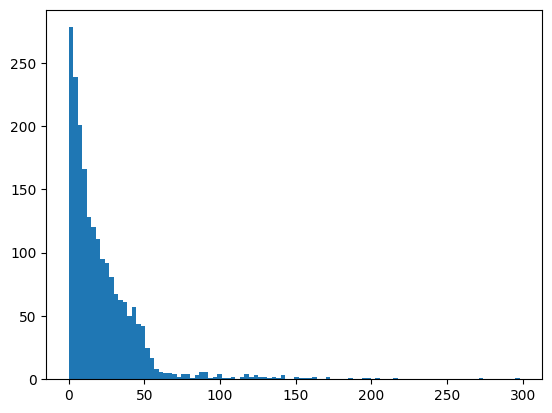

In [19]:
# read the csv file
import pandas as pd
import matplotlib.pyplot as plt


whole_csv = pd.read_csv("output/wholepsv.csv", index_col=["pid", "time"])
whole_csv = whole_csv.drop("SepsisLabel", axis=1)

def is_sepsis(whole_csv):
    whole_csv = whole_csv.copy()
    # judge whethe the patient timestep is sepsis based on the qsofa score
    # qsofa score is the sum of the following conditions:
    # 1. respiratory rate >= 22
    # 2. altered mental status (not supported, so currently ignore that)
    # 3. systolic blood pressure <= 100
    whole_csv["qsofa"] = 0
    whole_csv.loc[whole_csv["Resp"] >= 22, "qsofa"] += 1
    whole_csv.loc[whole_csv["SBP"] <= 100, "qsofa"] += 1
    # if both conditions met, then set the label to 1
    whole_csv["sepsis"] = 0
    whole_csv.loc[whole_csv["qsofa"] >= 2, "sepsis"] = 1
    return whole_csv

def plot_dist_first_occ_sepsis_time(whole_csv):
    sepsis_pids = whole_csv[whole_csv["sepsis"] == 1].index.get_level_values(0).unique()
    sepsis_csvs = []
    for pid in sepsis_pids:
        sepsis_csvs.append(whole_csv.loc[[pid]])
    sepsis_csvs = pd.concat(sepsis_csvs)
    first_occ_times = []
    for pid in sepsis_pids:
        subcsv = sepsis_csvs.loc[[pid]]
        subcsv = subcsv[subcsv["sepsis"] == 1]
        if len(subcsv) > 0:
            first_occ_time = subcsv.index[0][1]
            first_occ_times.append(first_occ_time)
    return first_occ_times

whole_csv = is_sepsis(whole_csv)
# plot the distribution of the first occurence of sepsis
first_occ_times = plot_dist_first_occ_sepsis_time(whole_csv)
plt.hist(first_occ_times, bins=100)
plt.show()

In [23]:
whole_csv.index.get_level_values(0).unique()

Index([ 6876, 16355, 15354,  5260,  1550, 10848,  8261,  8777,  9021,  7342,
       ...
        6697,  9011,  3974,   372,  8738,  3101,   230,  7769, 13419,  9265],
      dtype='int64', name='pid', length=4927)

In [24]:
whole_csv[whole_csv["sepsis"] == 1].index.get_level_values(0).unique()

Index([ 6876, 10848,  8261,  6938,   939,  7943, 18765,  1100, 12322, 16637,
       ...
       18877, 18288, 18274,  7093,  7023,  4154,  4923,  8738,  3101,  7769],
      dtype='int64', name='pid', length=2040)

In [25]:
whole_csv

HR  O2Sat   Temp    SBP    MAP   DBP   Resp  EtCO2  BaseExcess  \
pid  time                                                                     
6876 0     92.5   97.0  36.17  111.0  77.33   NaN  24.25    NaN         NaN   
     1     88.0   98.0    NaN  116.5  82.50   NaN  24.50    NaN         NaN   
     2     88.0   97.0    NaN  121.0  83.00   NaN  26.00    NaN         NaN   
     3     81.0   97.0    NaN   95.0  69.00  65.0  24.00    NaN        -6.0   
     4     79.0   97.0  35.72  108.5  71.33  61.0  21.00    NaN         NaN   
...         ...    ...    ...    ...    ...   ...    ...    ...         ...   
9265 50    89.0   95.0  36.50  112.0  70.00   NaN  21.00    NaN         NaN   
     51    93.0   96.0    NaN  118.0  72.00   NaN  19.00    NaN         NaN   
     52    93.0   97.0    NaN  115.0  72.00   NaN  20.00    NaN         NaN   
     53    86.0   98.0    NaN  120.0  77.00   NaN  12.00    NaN         NaN   
     54    84.0   98.0  36.56  118.0  75.00   NaN  12.00    NaN         NaN   

           HCO3  ...  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  \
pid  time        ...                                                       
6876 0     19.0  ...         NaN      242.0  86.44       1    1.0    0.0   
     1      NaN  ...         NaN        NaN  86.44       1    1.0    0.0   
     2      NaN  ...         NaN        NaN  86.44       1    1.0    0.0   
     3      NaN  ...         NaN        NaN  86.44       1    1.0    0.0   
     4     19.0  ...         NaN      210.0  86.44       1    1.0    0.0   
...         ...  ...         ...        ...    ...     ...    ...    ...   
9265 50     NaN  ...         NaN        NaN  71.09       1    1.0    0.0   
     51     NaN  ...         NaN        NaN  71.09       1    1.0    0.0   
     52     NaN  ...         NaN        NaN  71.09       1    1.0    0.0   
     53     NaN  ...         NaN        NaN  71.09       1    1.0    0.0   
     54     NaN  ...         NaN        NaN  71.09       1    1.0    0.0   

           HospAdmTime  ICULOS  qsofa  sepsis  
pid  time                                      
6876 0           -0.03       2      1       0  
     1           -0.03       3      1       0  
     2           -0.03       4      1       0  
     3           -0.03       5      2       1  
     4           -0.03       6      0       0  
...                ...     ...    ...     ...  
9265 50        -243.45      51      0       0  
     51        -243.45      52      0       0  
     52        -243.45      53      0       0  
     53        -243.45      54      0       0  
     54        -243.45      55      0       0  

[304660 rows x 42 columns]

In [28]:
whole_csv.index.get_level_values('pid').unique()

Index([ 6876, 16355, 15354,  5260,  1550, 10848,  8261,  8777,  9021,  7342,
       ...
        6697,  9011,  3974,   372,  8738,  3101,   230,  7769, 13419,  9265],
      dtype='int64', name='pid', length=4927)